In [1]:
import pandas as pd
from pandasql import sqldf
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

plt.style.use("fivethirtyeight")

In [2]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# iterate through all stock
# put them into a variable
if "df" not in locals():
    for stock in tech_list:
        globals()[stock.lower()] = yf.download(stock, start, end)

dfs = [aapl, goog, msft, amzn]
# give a company name to each df
for com, df in zip(tech_list, dfs):
    df["company_name"] = com

# concat dfs
df = pd.concat(dfs, axis=0)
assert len(df) == sum([len(df) for df in dfs])

# rename df columns and axis
df.columns = [i.lower().replace(" ", "_") for i in df.columns]
df = df.rename_axis("date")

print(df.shape)
df.head()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
(1004, 7)


,open,high,low,close,adj_close,volume,company_name
date,,,,,,,
2022-12-09,142.339996,145.570007,140.899994,142.160004,141.369797,76097000,AAPL
2022-12-12,142.699997,144.500000,141.059998,144.490005,143.686859,70462700,AAPL
2022-12-13,149.500000,149.970001,144.240005,145.470001,144.661423,93886200,AAPL
2022-12-14,145.350006,146.660004,141.160004,143.210007,142.413986,82291200,AAPL
2022-12-15,141.110001,141.800003,136.029999,136.500000,135.741272,98931900,AAPL


# 1. What was the change in price of the stock overtime?

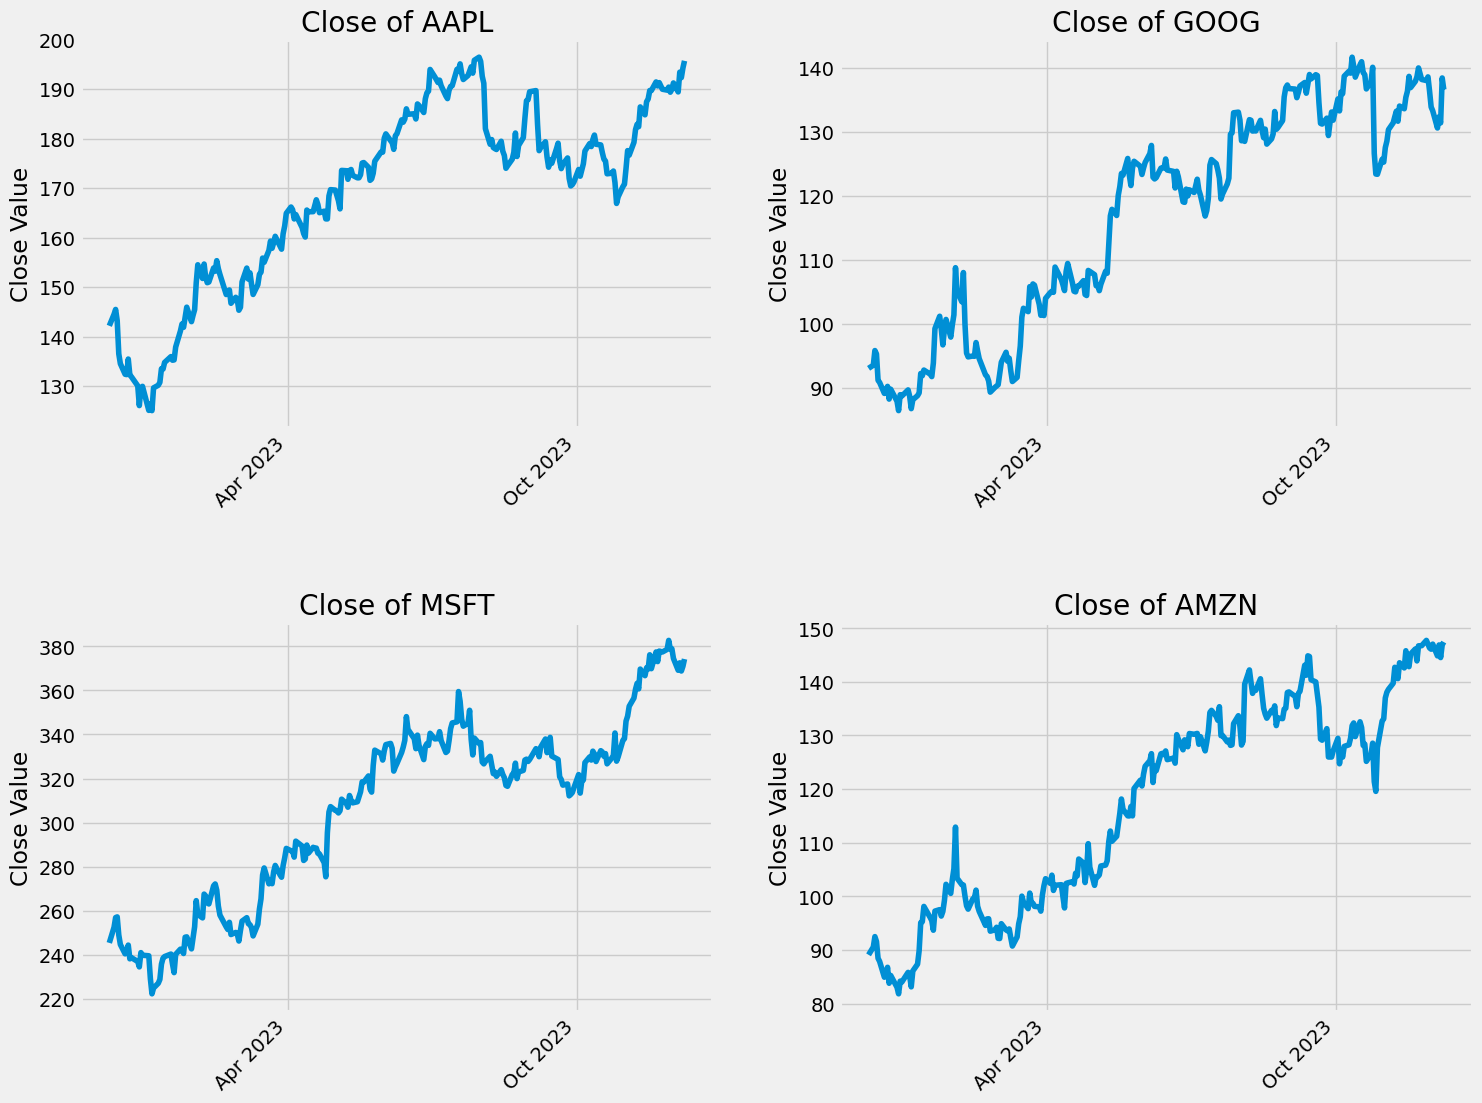

In [3]:
plt.figure(figsize=(16, 12))

for i, company in enumerate(tech_list, 1):
    
    plt.subplot(2, 2, i)
    
    # filter data for the current company
    data = sqldf(f"""
        SELECT date, close
        FROM df
        WHERE company_name = '{company}'
    """)
    data["date"] = pd.to_datetime(data["date"])
    
    # plot the data
    plt.plot(data['date'], data['close'])
    
    # format x-axis ticks
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    plt.xticks(rotation=45, ha='right')

    plt.title(f"Close of {company}")
    plt.xlabel('')
    plt.ylabel('Close Value')

plt.subplots_adjust(hspace=0.5)
plt.show()

# 2. What was the moving average of the various stocks?

/home/anj/miniconda3/envs/sql/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/anj/miniconda3/envs/sql/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/anj/miniconda3/envs/sql/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/anj/miniconda3/envs/sql/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isin

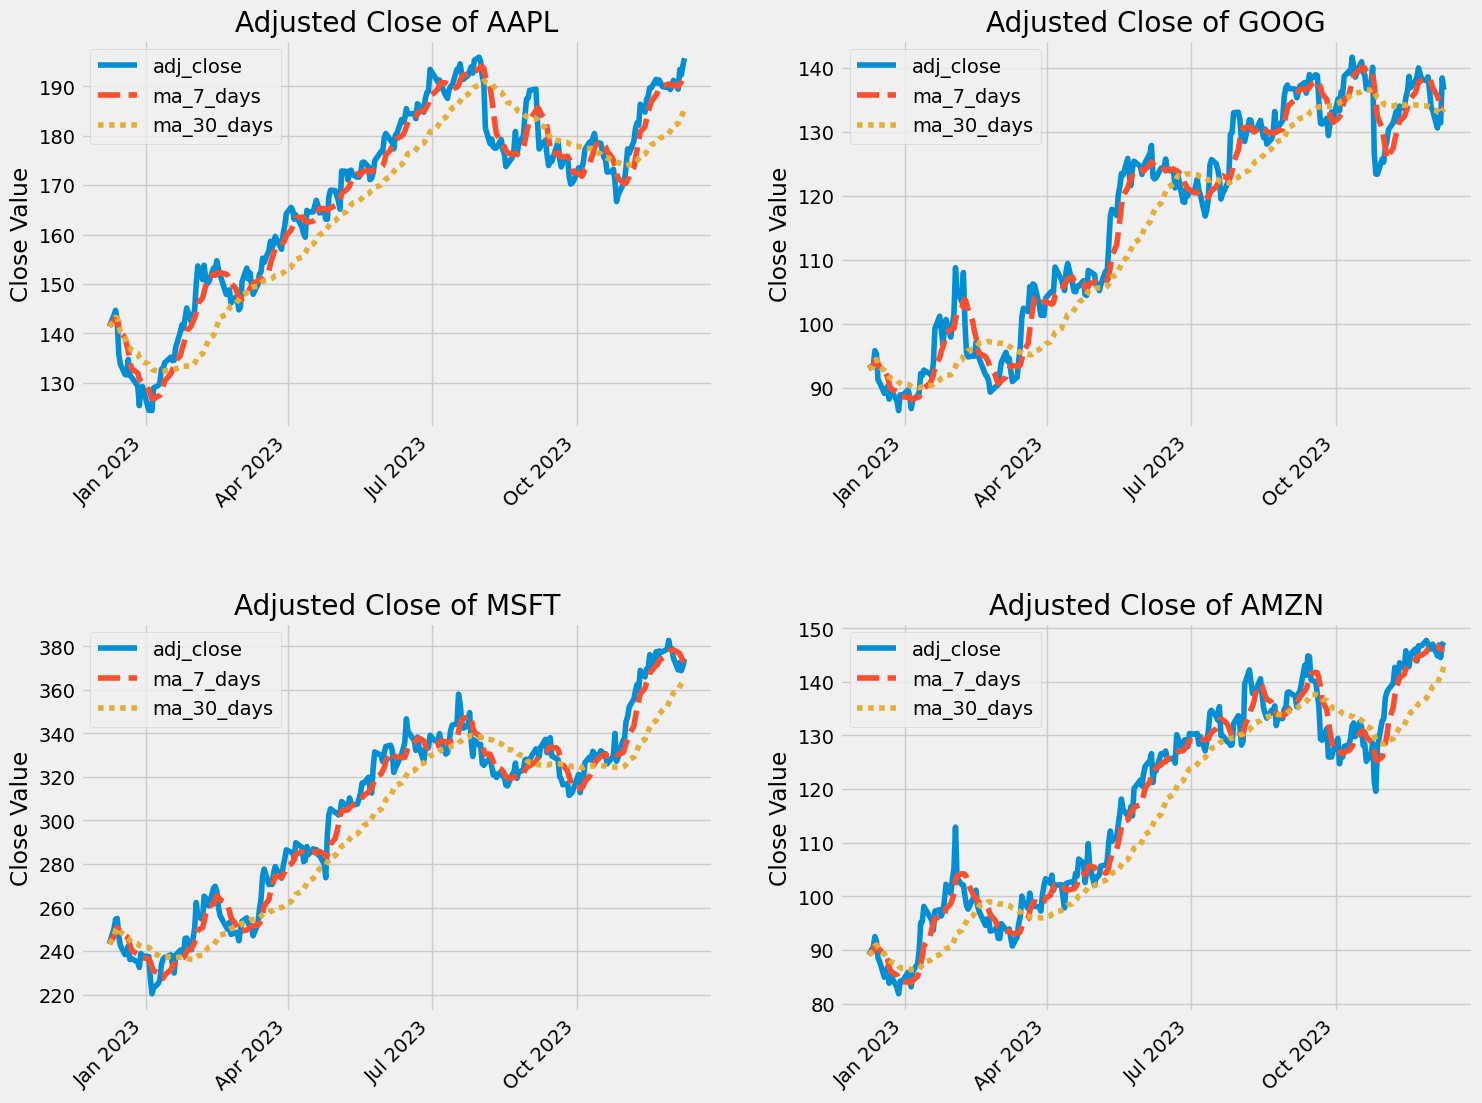

In [4]:
plt.figure(figsize=(16, 12))

for i, company in enumerate(tech_list, 1):
    
    plt.subplot(2, 2, i)

    data = sqldf(f"""
        SELECT 
            date, 
            adj_close, 
            AVG(adj_close) OVER(
                ORDER BY date
                ROWS BETWEEN 6 PRECEDING AND CURRENT ROW
            ) AS ma_7_days, 
            AVG(adj_close) OVER(
                ORDER BY date
                ROWS BETWEEN 29 PRECEDING AND CURRENT ROW
            ) AS ma_30_days
        FROM df
        WHERE company_name = '{company}'
    """)
    data["date"] = pd.to_datetime(data["date"])
    data = data.set_index("date")
    sns.lineplot(data)

    # format x-axis ticks
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    plt.xticks(rotation=45, ha='right')

    plt.title(f"Adjusted Close of {company}")
    plt.xlabel('')
    plt.ylabel('Close Value')

plt.subplots_adjust(hspace=0.5)
plt.show()

# 3. What was the daily return of the stock on average?

/home/anj/miniconda3/envs/sql/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/anj/miniconda3/envs/sql/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/anj/miniconda3/envs/sql/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/anj/miniconda3/envs/sql/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isin

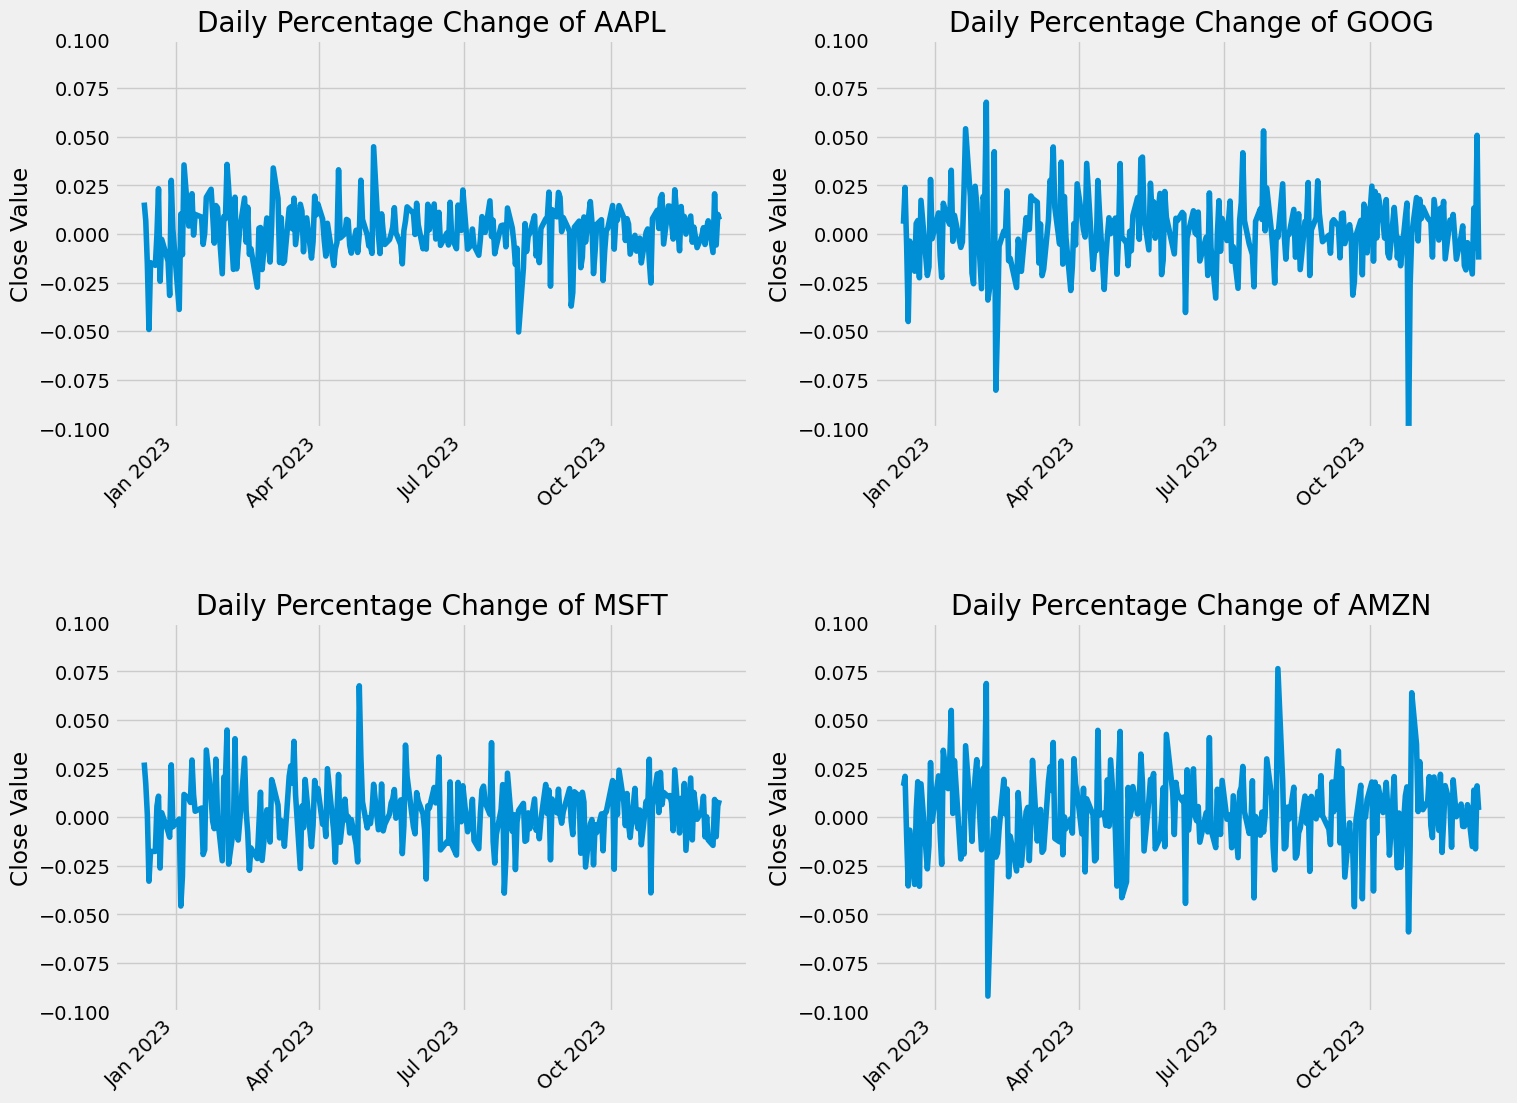

In [23]:
plt.figure(figsize=(16, 12))

for i, company in enumerate(tech_list, 1):
    
    ax = plt.subplot(2, 2, i)

    data = sqldf(f"""
    SELECT 
        date,
        (adj_close - LAG(adj_close) OVER (ORDER BY date ASC)) / adj_close AS pct_change
    FROM df
        WHERE company_name = '{company}'
    """)
    data["date"] = pd.to_datetime(data["date"])
    data = data.set_index("date")
    sns.lineplot(data)

    # format x-axis ticks
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    plt.xticks(rotation=45, ha='right')

    plt.title(f"Daily Percentage Change of {company}")
    plt.xlabel('')
    plt.ylabel('Close Value')
    ax.get_legend().remove()
    ax.set_ylim((-0.1, 0.1))

plt.subplots_adjust(hspace=0.5)
plt.show()

/home/anj/miniconda3/envs/sql/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/anj/miniconda3/envs/sql/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/anj/miniconda3/envs/sql/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/anj/miniconda3/envs/sql/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isin

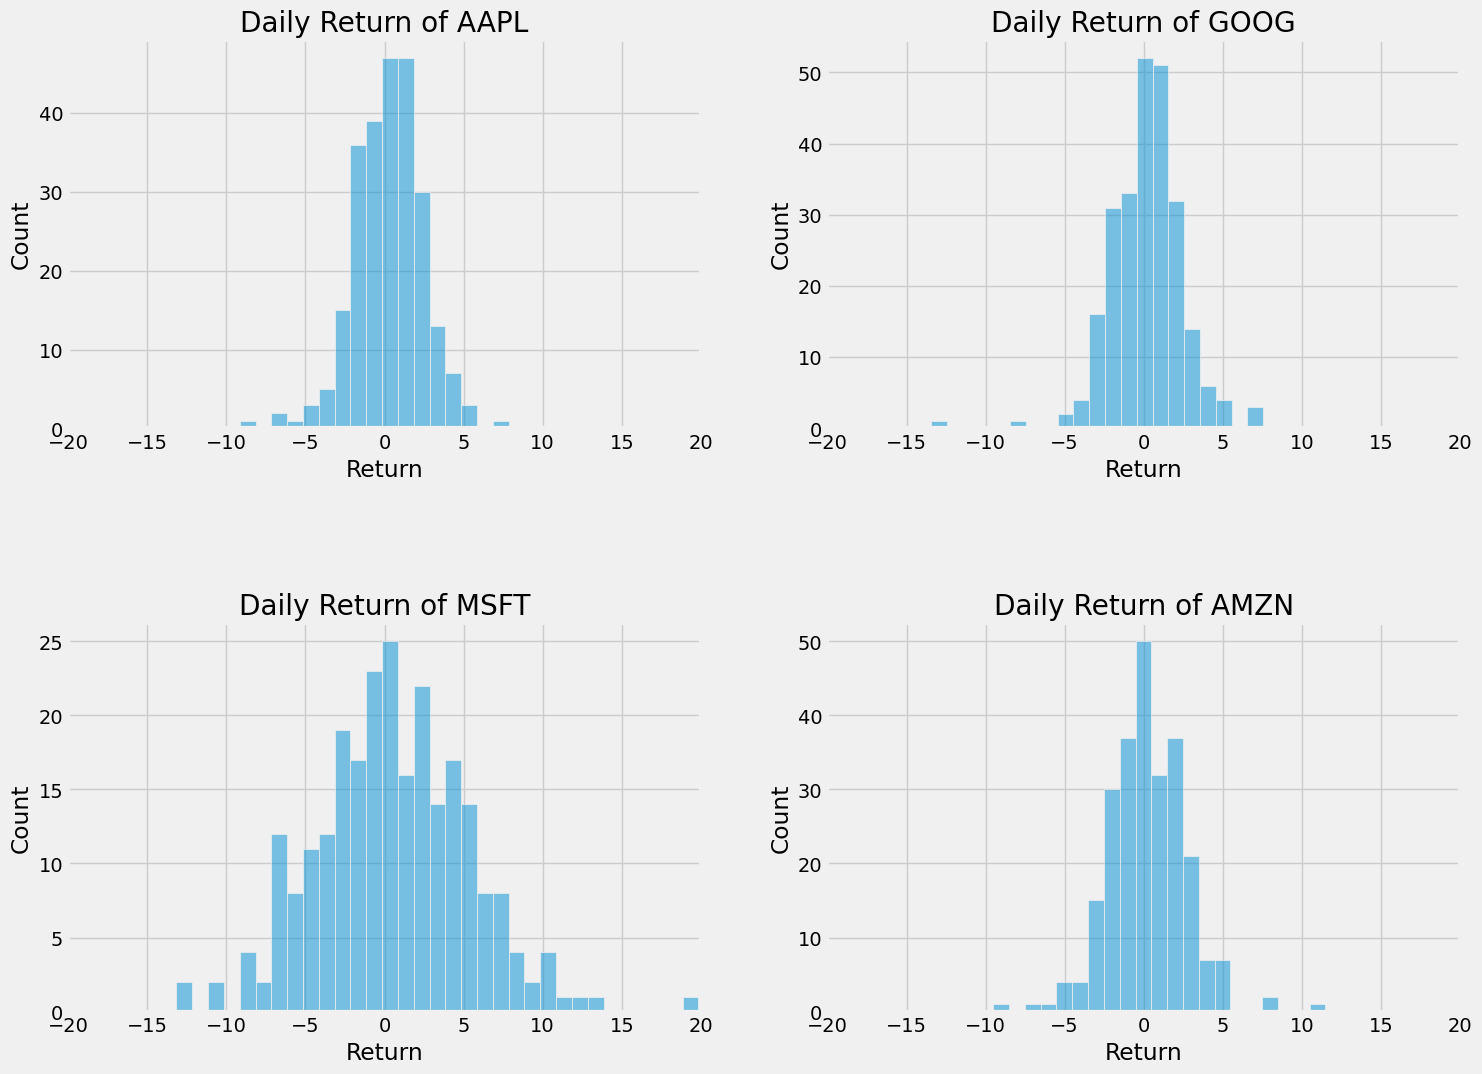

In [22]:
plt.figure(figsize=(16, 12))

for i, company in enumerate(tech_list, 1):
    
    ax = plt.subplot(2, 2, i)

    data = sqldf(f"""
    SELECT 
        adj_close - LAG(adj_close) OVER (ORDER BY date ASC) AS return
    FROM df
        WHERE company_name = '{company}'
    """)
    sns.histplot(data, binwidth=1)

    plt.title(f"Daily Return of {company}")
    plt.xlabel('Return')
    ax.get_legend().remove()
    ax.set_xlim((-20, 20))

plt.subplots_adjust(hspace=0.5)
plt.show()

# 4. What is the lowest, average and higest close for each company? Display in horizontal table.

In [90]:
sqldf("""
    WITH min_close AS (
        SELECT 
            'min_close' AS metrics,
            MIN(CASE WHEN company_name = 'AAPL' then close ELSE 10000 END) AS AAPL,
            MIN(CASE WHEN company_name = 'AMZN' then close ELSE 10000 END) AS AMZN,
            MIN(CASE WHEN company_name = 'GOOG' then close ELSE 10000 END) AS GOOG,
            MIN(CASE WHEN company_name = 'MSFT' then close ELSE 10000 END) AS MSFT
        FROM df
    ),
    avg_close AS (
        SELECT 
            'avg_close' AS metrics,
            AVG(CASE WHEN company_name = 'AAPL' then close ELSE NULL END) AS AAPL,
            AVG(CASE WHEN company_name = 'AMZN' then close ELSE NULL END) AS AMZN,
            AVG(CASE WHEN company_name = 'GOOG' then close ELSE NULL END) AS GOOG,
            AVG(CASE WHEN company_name = 'MSFT' then close ELSE NULL END) AS MSFT
        FROM df
    ),
    max_close AS (
        SELECT 
            'max_close' AS metrics,
            MAX(CASE WHEN company_name = 'AAPL' then close ELSE NULL END) AS AAPL,
            MAX(CASE WHEN company_name = 'AMZN' then close ELSE NULL END) AS AMZN,
            MAX(CASE WHEN company_name = 'GOOG' then close ELSE NULL END) AS GOOG,
            MAX(CASE WHEN company_name = 'MSFT' then close ELSE NULL END) AS MSFT
        FROM df
    )
    SELECT * FROM min_close
    UNION ALL
    SELECT * FROM avg_close
    UNION ALL
    SELECT * FROM max_close
""")

,metrics,AAPL,AMZN,GOOG,MSFT
0,min_close,125.019997,81.820000,86.459999,222.309998
1,avg_close,169.058287,117.622590,116.839422,306.486176
2,max_close,196.449997,147.729996,141.699997,382.700012


In [102]:
(df
    .groupby("company_name")
    .agg(
        min_close = ("close", "min"),
        avg_close = ("close", "mean"),
        max_close = ("close", "max")
    )
    .transpose()
    .rename_axis("metrics", axis=1)
)

metrics,AAPL,AMZN,GOOG,MSFT
min_close,125.019997,81.820000,86.459999,222.309998
avg_close,169.058287,117.622590,116.839422,306.486176
max_close,196.449997,147.729996,141.699997,382.700012


# 5. Retrieve all columns for the 'AAPL' stock where the closing price is greater than average

In [68]:
sqldf("""
    SELECT *
    FROM df 
    WHERE close > (SELECT AVG(close) FROM df WHERE company_name = 'AAPL')
    AND company_name = 'AAPL'
""")

,date,open,high,low,close,adj_close,volume,company_name
0,2023-04-28 00:00:00.000000,168.490005,169.850006,167.880005,169.679993,168.994476,55209200,AAPL
1,2023-05-01 00:00:00.000000,169.279999,170.449997,168.639999,169.589996,168.904846,52472900,AAPL
2,2023-05-05 00:00:00.000000,170.979996,174.300003,170.759995,173.570007,172.868759,113316400,AAPL
3,2023-05-08 00:00:00.000000,172.479996,173.850006,172.110001,173.500000,172.799042,55962800,AAPL
4,2023-05-09 00:00:00.000000,173.050003,173.539993,171.600006,171.770004,171.076035,45326900,AAPL
...,...,...,...,...,...,...,...,...
146,2023-12-04 00:00:00.000000,189.979996,190.050003,187.449997,189.429993,189.429993,43389500,AAPL
147,2023-12-05 00:00:00.000000,190.210007,194.399994,190.179993,193.419998,193.419998,66628400,AAPL
148,2023-12-06 00:00:00.000000,194.449997,194.759995,192.110001,192.320007,192.320007,41089700,AAPL
149,2023-12-07 00:00:00.000000,193.630005,195.000000,193.589996,194.270004,194.270004,47477700,AAPL


In [113]:
(df
    .loc[lambda df_: 
        (df_["company_name"] == "AAPL") &\
        (df_["close"] > (df_.loc[df_["company_name"] == "AAPL", "close"].mean()))
    ]
)

,open,high,low,close,adj_close,volume,company_name
date,,,,,,,
2023-04-28,168.490005,169.850006,167.880005,169.679993,168.994476,55209200,AAPL
2023-05-01,169.279999,170.449997,168.639999,169.589996,168.904846,52472900,AAPL
2023-05-05,170.979996,174.300003,170.759995,173.570007,172.868759,113316400,AAPL
2023-05-08,172.479996,173.850006,172.110001,173.500000,172.799042,55962800,AAPL
2023-05-09,173.050003,173.539993,171.600006,171.770004,171.076035,45326900,AAPL
...,...,...,...,...,...,...,...
2023-12-04,189.979996,190.050003,187.449997,189.429993,189.429993,43389500,AAPL
2023-12-05,190.210007,194.399994,190.179993,193.419998,193.419998,66628400,AAPL
2023-12-06,194.449997,194.759995,192.110001,192.320007,192.320007,41089700,AAPL


# 6. List the dates and closing prices for each company where the closing price is the highest for that company.

In [74]:
sqldf("""
    SELECT 
        df1.company_name,
        df1.date,
        df1.close AS max_close
    FROM df df1
    WHERE close = (
        SELECT MAX(close)
        FROM df df2
        WHERE df1.company_name = df2.company_name
    )
    ORDER BY df1.company_name
""")

,company_name,date,max_close
0,AAPL,2023-07-31 00:00:00.000000,196.449997
1,AMZN,2023-11-27 00:00:00.000000,147.729996
2,GOOG,2023-10-11 00:00:00.000000,141.699997
3,MSFT,2023-11-28 00:00:00.000000,382.700012


In [121]:
(df
    .assign(
        max_close = (df.groupby("company_name")["close"].transform("max"))
    )
    .loc[lambda df_: 
        df_["close"] == df_["max_close"], 
        ["company_name", "close"]
    ]
    .sort_values("company_name")
)

,company_name,close
date,,
2023-07-31,AAPL,196.449997
2023-11-27,AMZN,147.729996
2023-10-11,GOOG,141.699997
2023-11-28,MSFT,382.700012


# 7. Count the number of days per company when the stock had a closing price less than average of that company.

In [84]:
sqldf("""
    SELECT 
        df1.company_name,
        COUNT(*) AS num_days_below_avg
    FROM df df1
    WHERE close < (
        SELECT AVG(close)
        FROM df df2
        WHERE df1.company_name = df2.company_name
    )
    GROUP BY df1.company_name
    ORDER BY df1.company_name
""")

,company_name,num_days_below_avg
0,AAPL,100
1,AMZN,114
2,GOOG,104
3,MSFT,99


In [122]:
(df
    .assign(
        avg = lambda df_: df_.groupby("company_name")["close"].transform("mean")
    )
    .loc[
        lambda df_: df_["close"] < df_["avg"]
    ]
    .groupby("company_name")
    .agg(
        num_days_below_avg = ("company_name", "count")   
    )
)

,num_days_below_avg
company_name,
AAPL,100
AMZN,114
GOOG,104
MSFT,99


# 8. Retrieve the top 5 dates with the highest trading volume for 'AMZN'. Display the date and volume.

In [128]:
sqldf("""
    SELECT 
        date, 
        volume
    FROM df
    WHERE company_name = 'AMZN'
    ORDER BY volume DESC
    LIMIT 5
""")

,date,volume
0,2023-02-02 00:00:00.000000,158154200
1,2023-08-04 00:00:00.000000,152938700
2,2023-04-27 00:00:00.000000,149961200
3,2022-12-16 00:00:00.000000,146144100
4,2023-02-03 00:00:00.000000,144374800


In [132]:
(df
    .loc[
        df["company_name"] == 'AMZN', 
        ["volume"]
    ]
    .sort_values("volume", ascending=False)
    .head()
)

,volume
date,
2023-02-02,158154200
2023-08-04,152938700
2023-04-27,149961200
2022-12-16,146144100
2023-02-03,144374800


# 9. Retrieve the dates and closing prices for 'AAPL' and 'GOOG' where the closing prices are within 36 units of each other.

In [155]:
sqldf("""
    WITH aapl AS (
        SELECT 
            date,
            close AS aapl_close
        FROM df 
        WHERE company_name = 'AAPL'
    ),
    goog AS (
        SELECT 
            date,
            close AS goog_close
        FROM df
        WHERE company_name = 'GOOG'
    ) 
    SELECT 
        aapl.date, 
        aapl.aapl_close,
        goog.goog_close,
        ABS(aapl.aapl_close - goog.goog_close) AS abs_diff
    FROM aapl
    INNER JOIN goog
    ON aapl.date = goog.date
    WHERE abs_diff < 36
""")

,date,aapl_close,goog_close,abs_diff
0,2023-01-03 00:00:00.000000,125.070000,89.699997,35.370003
1,2023-10-23 00:00:00.000000,173.000000,137.899994,35.100006
2,2023-10-24 00:00:00.000000,173.440002,140.119995,33.320007


In [166]:
(df
    .reset_index()
    .pivot(
        index="date",
        columns="company_name",
        values="close"
    )
    .assign(
        abs_diff=lambda df_: abs(df_["AAPL"] - df_["GOOG"])
    )
    .loc[lambda df_: 
        df_["abs_diff"] < 36, 
        ["AAPL", "GOOG", "abs_diff"]
    ]
)

company_name,AAPL,GOOG,abs_diff
date,,,
2023-01-03,125.070000,89.699997,35.370003
2023-10-23,173.000000,137.899994,35.100006
2023-10-24,173.440002,140.119995,33.320007
